# IMDB dataset - Actor network analysis (Part 1)

What is the key of a successful movie? An interesting story? Beautiful cinematography? A great director? The right cast? 

While a cast of top Hollywood stars is a well-known formula for blockbusters, does it also affect the way it's perceived among the audience? Are there actors that bound to act in highly-perceived movies, and actors that bound to act in worse ones? Those questions can partly be answered by an actor network analysis of [this IMDB dataset](https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset). 

We would use [Gephi](https://gephi.org/), an amazing open-source package specialized for network analysis and data visualization. But first of all, we can explore and clean the data with Jupyter notebook.

First, we need to import the necessary library for our analysis. Since we would do most of the analysis with Gephi, we only need to use `pandas`, `numpy` and `matplotlib` in python.

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Then we would use `pandas` to read the csv file:

In [2]:
# Read the csv file
movies = pd.read_csv("movie_metadata.csv")

What do we have on hand? Let's find out.

In [3]:
# Print the column names
movies.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [4]:
# How many movies do we have?
movies.shape

(5043, 28)

In [5]:
# Drop the duplicates, just in case.
movies = movies.drop_duplicates()
movies.shape

(4998, 28)

Before concerning about the IMDB scores, we all know the difference between a movie rated by 10 users and a movie rated by 100,000 users. For our analysis, we hopefully would want the movies that are either well-liked or well-disliked universally in the IMDB community. Since IMDB is a big community, how many votes is a movie typically received?

In [6]:
# Summary statistics of num_voted_users
movies['num_voted_users'].describe()

count    4.998000e+03
mean     8.347020e+04
std      1.380866e+05
min      5.000000e+00
25%      8.560000e+03
50%      3.426050e+04
75%      9.612075e+04
max      1.689764e+06
Name: num_voted_users, dtype: float64

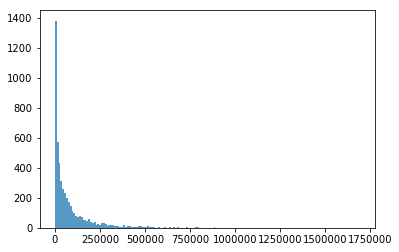

In [7]:
plt.hist(movies['num_voted_users'], 'auto', alpha=0.75)
plt.show()

We can see there's a big difference between the minimum number of votes and the maximum one, so we can use the median number of votes to offset both the extremes. For the accuracy of our analysis, we only need movies that are rated by 34,000 users or more:

In [8]:
voted_movies = movies[movies['num_voted_users'] >= 34000]

In [9]:
# Summary statistics of the score:
voted_movies['imdb_score'].describe()

count    2508.000000
mean        6.791707
std         0.954996
min         1.600000
25%         6.200000
50%         6.800000
75%         7.500000
max         9.300000
Name: imdb_score, dtype: float64

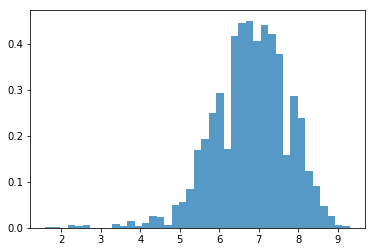

In [10]:
plt.hist(voted_movies['imdb_score'], 'auto', normed = 100, alpha=0.75)
plt.show()

We can see that a 7.5 score is at the 75th percentile (very well-liked), while a 6.2 score is at 25th percentile (generally well-disliked). We can subset them as the `high_score` and `low_score` datasets for our analysis. 

In [11]:
high_score = voted_movies[(voted_movies['imdb_score'] >= 7.5)]
low_score = voted_movies[(voted_movies['imdb_score'] <= 6.2)]

In [12]:
# Sort the dataset by score:
high_score = high_score.sort_values(by = "imdb_score", ascending = False)

In [13]:
high_score

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1937,Color,Frank Darabont,199.0,142.0,0.0,461.0,Jeffrey DeMunn,11000.0,28341469.0,Crime|Drama,...,4144.0,English,USA,R,25000000.0,1994.0,745.0,9.3,1.85,108000
3466,Color,Francis Ford Coppola,208.0,175.0,0.0,3000.0,Marlon Brando,14000.0,134821952.0,Crime|Drama,...,2238.0,English,USA,R,6000000.0,1972.0,10000.0,9.2,1.85,43000
2837,Color,Francis Ford Coppola,149.0,220.0,0.0,3000.0,Al Pacino,22000.0,57300000.0,Crime|Drama,...,650.0,English,USA,R,13000000.0,1974.0,14000.0,9.0,1.85,14000
3481,Color,NaN,54.0,53.0,NaN,1000.0,Adam Goldberg,4000.0,NaN,Crime|Drama|Thriller,...,173.0,English,USA,TV-MA,NaN,NaN,1000.0,9.0,1.78,61000
66,Color,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,533316061.0,Action|Crime|Drama|Thriller,...,4667.0,English,USA,PG-13,185000000.0,2008.0,13000.0,9.0,2.35,37000
4822,Black and White,Sidney Lumet,177.0,96.0,0.0,253.0,Lee J. Cobb,359.0,NaN,Crime|Drama,...,888.0,English,USA,Not Rated,350000.0,1957.0,259.0,8.9,1.66,40000
4498,Color,Sergio Leone,181.0,142.0,0.0,24.0,Luigi Pistilli,16000.0,6100000.0,Western,...,780.0,Italian,Italy,Approved,1200000.0,1966.0,34.0,8.9,2.35,20000
3355,Color,Quentin Tarantino,215.0,178.0,16000.0,857.0,Eric Stoltz,13000.0,107930000.0,Crime|Drama,...,2195.0,English,USA,R,8000000.0,1994.0,902.0,8.9,2.35,45000
1874,Black and White,Steven Spielberg,174.0,185.0,14000.0,212.0,Embeth Davidtz,14000.0,96067179.0,Biography|Drama|History,...,1273.0,English,USA,R,22000000.0,1993.0,795.0,8.9,1.85,41000
339,Color,Peter Jackson,328.0,192.0,0.0,416.0,Billy Boyd,5000.0,377019252.0,Action|Adventure|Drama|Fantasy,...,3189.0,English,USA,PG-13,94000000.0,2003.0,857.0,8.9,2.35,16000


In [14]:
# Only extract the info we want:
high_score_df = high_score[['movie_title','actor_1_name', 'actor_2_name', 'actor_3_name', 'imdb_score']]
high_score_df

,movie_title,actor_1_name,actor_2_name,actor_3_name,imdb_score
1937,The Shawshank Redemption,Morgan Freeman,Jeffrey DeMunn,Bob Gunton,9.3
3466,The Godfather,Al Pacino,Marlon Brando,Robert Duvall,9.2
2837,The Godfather: Part II,Robert De Niro,Al Pacino,Robert Duvall,9.0
3481,Fargo,Kirsten Dunst,Adam Goldberg,Oliver Platt,9.0
66,The Dark Knight,Christian Bale,Heath Ledger,Morgan Freeman,9.0
4822,12 Angry Men,Jack Warden,Lee J. Cobb,John Fiedler,8.9
4498,"The Good, the Bad and the Ugly",Clint Eastwood,Luigi Pistilli,Enzo Petito,8.9
3355,Pulp Fiction,Bruce Willis,Eric Stoltz,Phil LaMarr,8.9
1874,Schindler's List,Liam Neeson,Embeth Davidtz,Caroline Goodall,8.9
339,The Lord of the Rings: The Return of the King,Orlando Bloom,Billy Boyd,Bernard Hill,8.9


*The Shawshank Redemption*, *The Godfather I and II*, *The Dark Knight* and *Fargo* as the top 5? Sounds about right. If you haven't watched them, you definitely should! 

How about the worst ones?

In [15]:
# Sort by scores:
low_score = low_score.sort_values(by = "imdb_score", ascending = True)
# Extract info needed:
low_score_df = low_score[['movie_title','actor_1_name', 'actor_2_name', 'actor_3_name', 'imdb_score']]
low_score_df

,movie_title,actor_1_name,actor_2_name,actor_3_name,imdb_score
2834,Justin Bieber: Never Say Never,Usher Raymond,Sean Kingston,Boys II Men,1.6
2268,Disaster Movie,Carmen Electra,Tony Cox,Ike Barinholtz,1.9
319,Son of the Mask,Jamie Kennedy,Traylor Howard,Ben Stein,2.2
2192,Epic Movie,David Carradine,Carmen Electra,Fred Willard,2.3
2313,Alone in the Dark,Catherine Lough Haggquist,Darren Shahlavi,Karin Konoval,2.3
495,Battlefield Earth,Richard Tyson,Michael Byrne,John Topor,2.4
899,Gigli,Todd Giebenhain,Lenny Venito,David Backus,2.4
1654,Meet the Spartans,Carmen Electra,Diedrich Bader,Method Man,2.7
1702,Dragonball: Evolution,Ian Whyte,Texas Battle,Randall Duk Kim,2.7
2182,Date Movie,Alyson Hannigan,Carmen Electra,Fred Willard,2.7


Hmm... The list is very diverse. While the bottom of the list with the 6.2 movies can be good or bad depends on each person's opinion, the top of the list with *Dragonball: Evolution*, *Catwoman*, *Fifty shades of Grey* and the legendary *The Last Airbender* are widely considered some of the worst movies of all time. Also sounds about right. ~~I also wonder why Justin Bieber isn't include in the top cast of the movie about himself, and poor Usher!~~

Now, after our confirmation, the last step is to clean the datasets and make them Gephi-ready. Our goal is to generate an actor network analysis of the top and worst movies on IMDB, so any other extra information is not needed. Since Gephi also recognizes [adjacency list](https://gephi.org/users/supported-graph-formats/csv-format/) instead of just node and edge lists, we only need to extract a list of three actors seperated by semicolons; Gephi would do the rest of the work.

In [16]:
def gephi(df):
    df = df.drop(['movie_title', 'imdb_score'], axis = 1) # drop extra columns
    df = df.replace(' ', '_', regex=True) # replace whitespace by underscore, since Gephi doesn't recognize spaces
    df = df.reset_index(drop=True) # reset indices
    return(df)

In [17]:
high_score_df = gephi(high_score_df)
high_score_df

,actor_1_name,actor_2_name,actor_3_name
0,Morgan_Freeman,Jeffrey_DeMunn,Bob_Gunton
1,Al_Pacino,Marlon_Brando,Robert_Duvall
2,Robert_De_Niro,Al_Pacino,Robert_Duvall
3,Kirsten_Dunst,Adam_Goldberg,Oliver_Platt
4,Christian_Bale,Heath_Ledger,Morgan_Freeman
5,Jack_Warden,Lee_J._Cobb,John_Fiedler
6,Clint_Eastwood,Luigi_Pistilli,Enzo_Petito
7,Bruce_Willis,Eric_Stoltz,Phil_LaMarr
8,Liam_Neeson,Embeth_Davidtz,Caroline_Goodall
9,Orlando_Bloom,Billy_Boyd,Bernard_Hill


In [18]:
low_score_df = gephi(low_score_df)
low_score_df

,actor_1_name,actor_2_name,actor_3_name
0,Usher_Raymond,Sean_Kingston,Boys_II_Men
1,Carmen_Electra,Tony_Cox,Ike_Barinholtz
2,Jamie_Kennedy,Traylor_Howard,Ben_Stein
3,David_Carradine,Carmen_Electra,Fred_Willard
4,Catherine_Lough_Haggquist,Darren_Shahlavi,Karin_Konoval
5,Richard_Tyson,Michael_Byrne,John_Topor
6,Todd_Giebenhain,Lenny_Venito,David_Backus
7,Carmen_Electra,Diedrich_Bader,Method_Man
8,Ian_Whyte,Texas_Battle,Randall_Duk_Kim
9,Alyson_Hannigan,Carmen_Electra,Fred_Willard


Now, the last step is to save them as .csv files. The elements are separated by semicolons, and we don't need either the indices or the header.

In [19]:
high_score_df.to_csv("high_score_df.csv", sep = ";", index = False, header = False)
low_score_df.to_csv("low_score_df.csv", sep = ";", index = False, header = False)

All done! Now we can turn to Gephi for the next step!